<a href="https://colab.research.google.com/github/joepaul13/Denoising-Sound-Signals/blob/main/Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def draw(x_axis, y_axis, label, color, x_label, y_label, title, lw):
  plt.figure(figsize = (15,5))
  plt.grid(alpha = 0.3)
  plt.style.use('dark_background')
  plt.plot(x_axis, y_axis, label = label, color = color, linewidth = lw)
  plt.xlabel(x_label, fontsize = 20)
  plt.ylabel(y_label, fontsize = 20)
  plt.title(title, fontsize = 30)
  plt.legend(loc = 'upper right')
  plt.show()
  return 


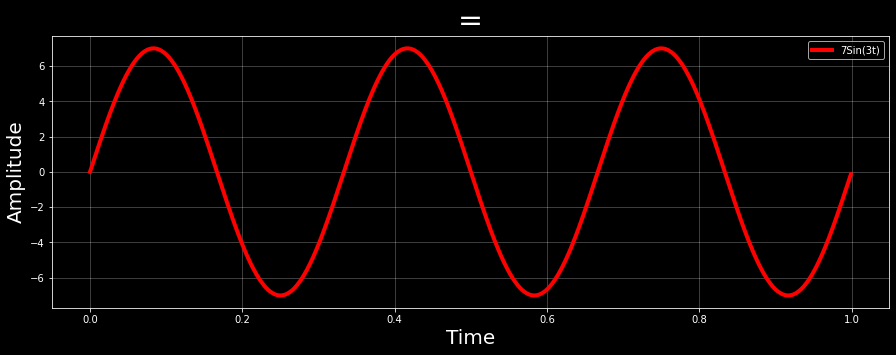

In [4]:
dt = 0.001
t = np.arange(0,1,dt)

#Plotting a sine signal of frequency 3 Hz
sin3t = 7 * np.sin(2 * np.pi * 3 * t)
draw(x_axis = t, y_axis = sin3t, label = "7Sin(3t)", color = "r", x_label = "Time", y_label = "Amplitude", title = "=", lw = 4)

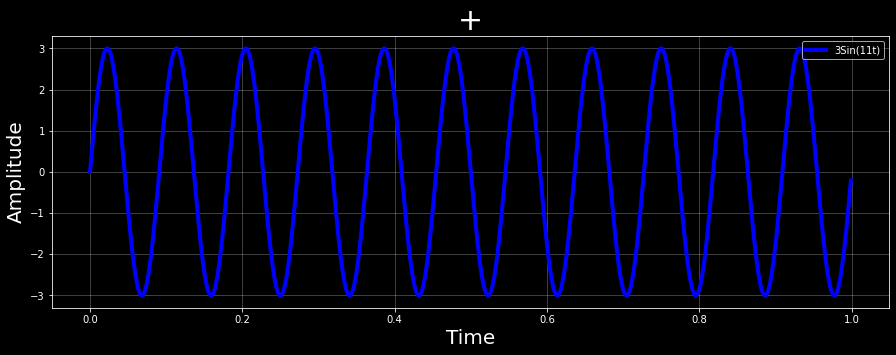

In [5]:
#Plotting a sine signal of frequency 11 Hz
sin11t = 3 * np.sin(2 * np.pi * 11 * t)
draw(x_axis = t, y_axis = sin11t, label = "3Sin(11t)", color = "blue", x_label = "Time", y_label = "Amplitude", title = "+", lw = 4)

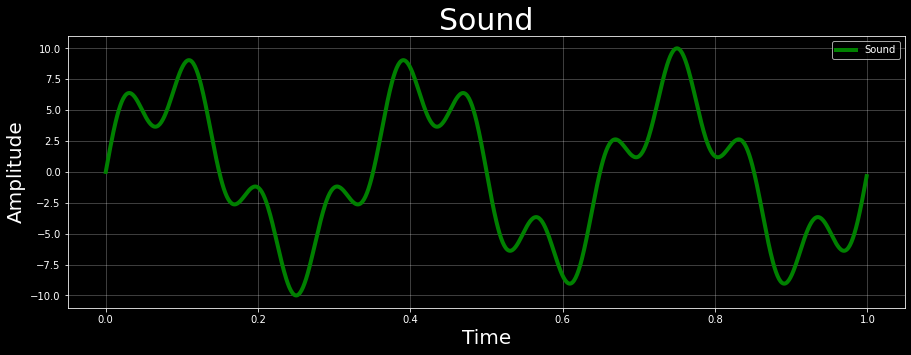

In [6]:
#Plotting sound as the sum of the above 2 sine functions
Sum = sin3t + sin11t
draw(x_axis = t, y_axis = Sum, label = "Sound", color = "green", x_label = "Time", y_label = "Amplitude", title = "Sound", lw = 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


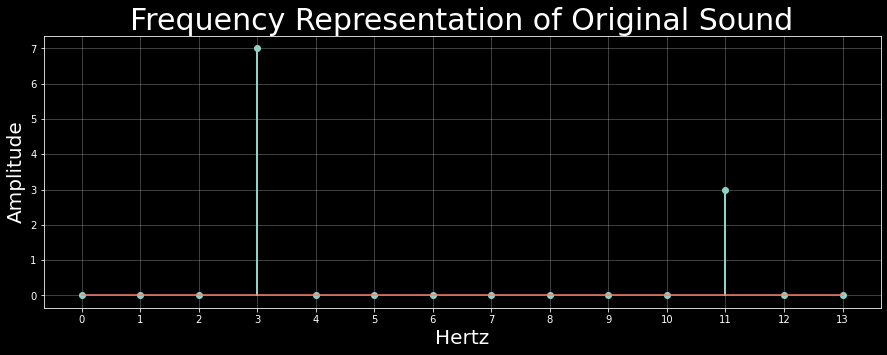

In [16]:
#Generating frequency distribution of original sound with amplitude
ft = np.fft.fft(Sum)/len(Sum)
tpCount = len(Sum)
values = np.arange(int(tpCount/2))
timePeriod = tpCount/1000

frequency = values/timePeriod
plt.figure(figsize = (15,5))
plt.grid(alpha = 0.3)
plt.xticks(np.arange(14))
plt.style.use('dark_background')
plt.title("Frequency Representation of Original Sound", fontsize = 30)
plt.xlabel("Hertz", fontsize = 20)
plt.ylabel("Amplitude", fontsize = 20)
markerline, stemlines, baseline = plt.stem(frequency[0:14], 2*abs(ft[0:14]), label = "Sound")
plt.setp(stemlines, 'linewidth', 2)
plt.savefig("fr_rep1.png")
plt.show()

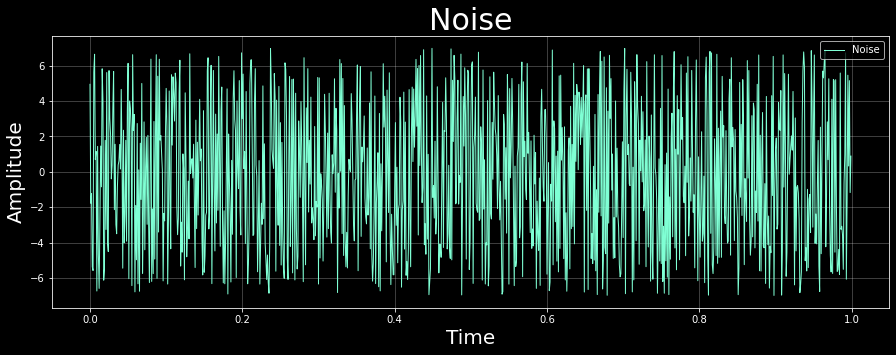

In [10]:
#Generating a random noise
Noise = 14 * np.random.sample(len(t)) - 7
draw(x_axis = t, y_axis = Noise, label = "Noise", color = "aquamarine", x_label = "Time", y_label = "Amplitude", title = "Noise", lw = 1)

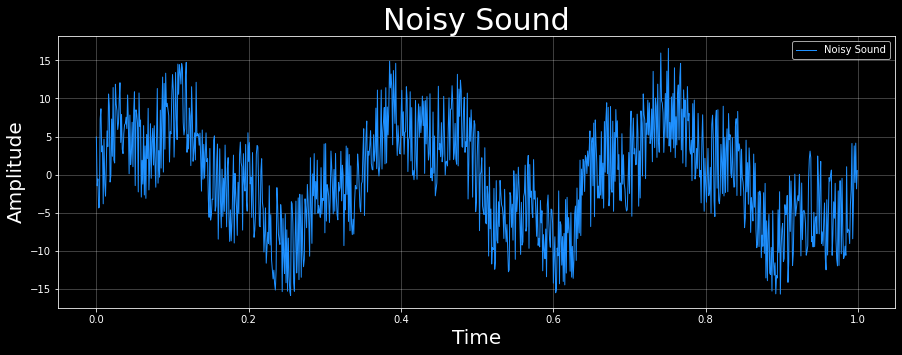

In [11]:
Noisy = Noise + Sum
draw(x_axis = t, y_axis = Noisy, label = "Noisy Sound", color = "dodgerblue", x_label = "Time", y_label = "Amplitude", title = "Noisy Sound", lw = 1)

<function matplotlib.pyplot.show>

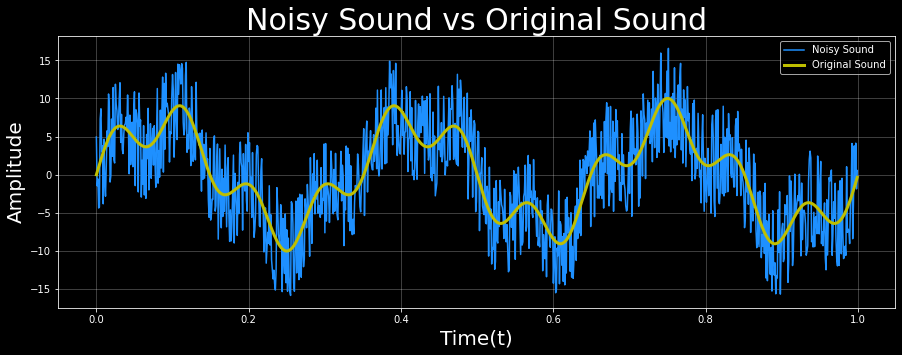

In [15]:
#Plotting noise and original sound in the same graph
plt.figure(figsize = (15,5))
plt.grid(alpha = 0.3)
plt.style.use('dark_background')
plt.plot(t, Noisy, label = "Noisy Sound", color = "dodgerblue")
plt.plot(t, Sum, label = "Original Sound", color = "y", linewidth = 3)
plt.xlabel("Time(t)", fontsize = 20)
plt.ylabel("Amplitude", fontsize= 20)
plt.title("Noisy Sound vs Original Sound",fontsize = 30)
plt.legend(loc='upper right')
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


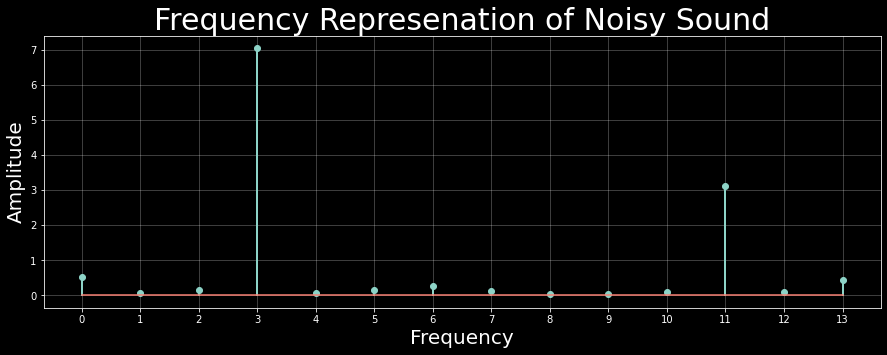

In [18]:
#Generating frequency distribution of noisy sound with amplitude
ft = np.fft.fft(Noisy)/len(Noisy)
tpCount = len(Noisy)
values = np.arange(int(tpCount/2))
timePeriod = tpCount/1000
Frequency = values/timePeriod
psd = 2 * abs(ft)
plt.figure(figsize = (15,5))
plt.title("Frequency Represenation of Noisy Sound", fontsize = 30)
plt.xlabel("Frequency", fontsize = 20)
plt.ylabel("Amplitude", fontsize = 20)
plt.grid(alpha = 0.3)
plt.style.use('dark_background')
plt.xticks(np.arange(14))
markerline, stemlines, baseline = plt.stem(Frequency[0:14], psd[0:14])
plt.setp(stemlines, 'linewidth', 2)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


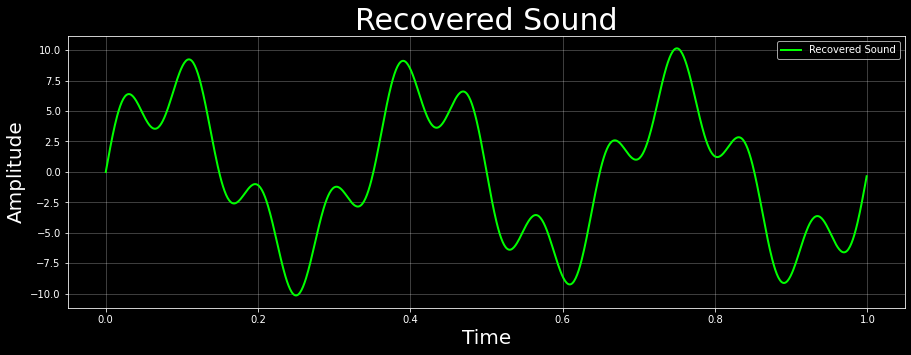

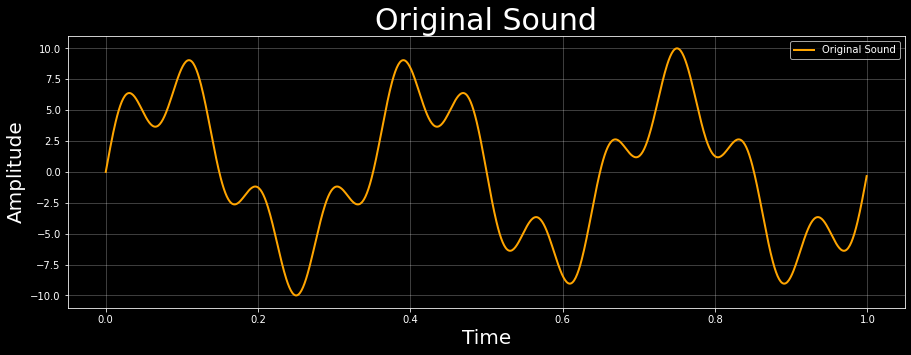

In [21]:
#Filtering only those frequencies that are prominent (greater than 2 Hz)
indices = [psd > 2]
filt_ft = ft * indices

#Applying Inverse Fourier Transform on the filtered Fourier transform to get back original sound
inve_ft = np.fft.ifft(filt_ft)
draw(x_axis = t, y_axis = 1000*inve_ft.reshape((1000,)), label="Recovered Sound", color="lime", x_label = "Time", y_label = "Amplitude", title="Recovered Sound",lw=2)
draw(x_axis = t,y_axis = Sum ,label="Original Sound", color="orange", x_label = "Time", y_label = "Amplitude", title="Original Sound", lw=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


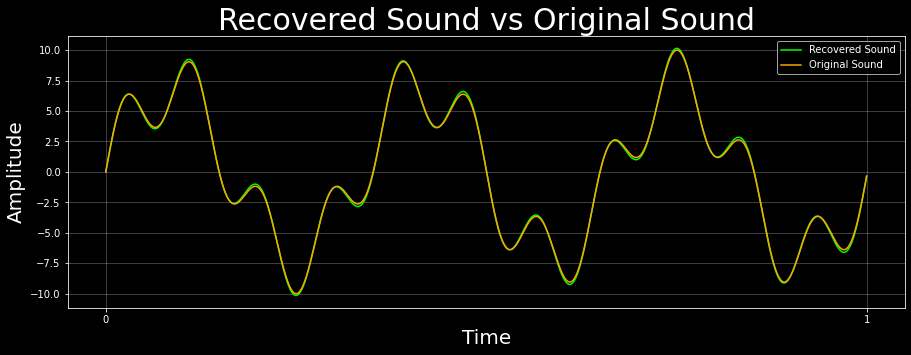

In [24]:
#Plotting and comparing the recovered and original signals
plt.figure(figsize = (15,5))
plt.grid(alpha = 0.3)
plt.xticks(np.arange(13))
plt.style.use('dark_background')
plt.plot(t, 1000*inve_ft.reshape((1000,)), label="Recovered Sound", color="lime")
plt.plot( t, Sum, label="Original Sound", color="orange")
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Amplitude", fontsize= 20)
plt.title("Recovered Sound vs Original Sound",fontsize = 30)
plt.legend(loc='upper right')
plt.savefig('sound.png')
plt.show()